In [195]:
print('a')

a


## data cleaning

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12T10:50:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20T07:52:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24T07:44:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19T12:24:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06T23:04:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES


In [3]:
duplicate_groups = df['group_id'][df['group_id'].duplicated()]
print(duplicate_groups.nunique())
print(duplicate_groups.value_counts())
df[df['num_requests'] > 1]['group_id'].value_counts()

0
Series([], Name: count, dtype: int64)


group_id
820673    1
342963    1
430927    1
44413     1
464553    1
         ..
489829    1
522762    1
652880    1
246840    1
911320    1
Name: count, Length: 20089, dtype: int64

In [4]:
df_snow = df[df['request_type_name'].str.contains('Snow/Ice Removal', case=False, na=False)]
df_snow.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
423,424,604051,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-02-02T11:30:00,...,0.0,Pittsburgh,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,EXACT
463,464,694389,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-11-17T08:30:00,...,0.0,Pittsburgh,NaN,4.200302e+10,6.0,NaN,NaN,40.446432,-79.999620,EXACT
1430,1431,606017,1,f,open,0,DOMI - Permits,"Sidewalk, Lack of Snow/Ice Removal",558,2022-02-07T09:53:00,...,0.0,Pittsburgh,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,EXACT
1877,1878,811542,1,t,closed,1,DPW - Street Maintenance,Snow/Ice removal,494,2024-01-18T07:37:00,...,0.0,Pittsburgh,NaN,4.200316e+10,3.0,NaN,NaN,40.432962,-79.973672,EXACT
1994,1995,596039,1,f,open,0,DPW - Street Maintenance,Snow/Ice removal,494,2022-01-18T09:48:00,...,0.0,Pittsburgh,Summer Hill,4.200326e+10,1.0,26.0,1.0,40.483512,-80.003578,EXACT


In [5]:
df_snow_unique = df_snow.sort_values(by='create_date_et').drop_duplicates(subset='group_id', keep='first')

In [6]:
df_snow_unique['create_date_et'] = pd.to_datetime(df['create_date_et'])
df_daily = df_snow_unique.groupby(df_snow_unique['create_date_et'].dt.date).size().reset_index(name='num_requests')


df_daily['date'] = pd.to_datetime(df_daily['create_date_et'])
df_daily.set_index('date', inplace=True)
ts = df_daily['num_requests'].asfreq('D')

In [7]:
ts = df_daily['num_requests'].asfreq('D').fillna(0)

In [8]:
ts

date
2015-04-22     1.0
2015-04-23     0.0
2015-04-24     0.0
2015-04-25     0.0
2015-04-26     0.0
              ... 
2024-12-12    38.0
2024-12-13    49.0
2024-12-14     0.0
2024-12-15     0.0
2024-12-16     2.0
Freq: D, Name: num_requests, Length: 3527, dtype: float64

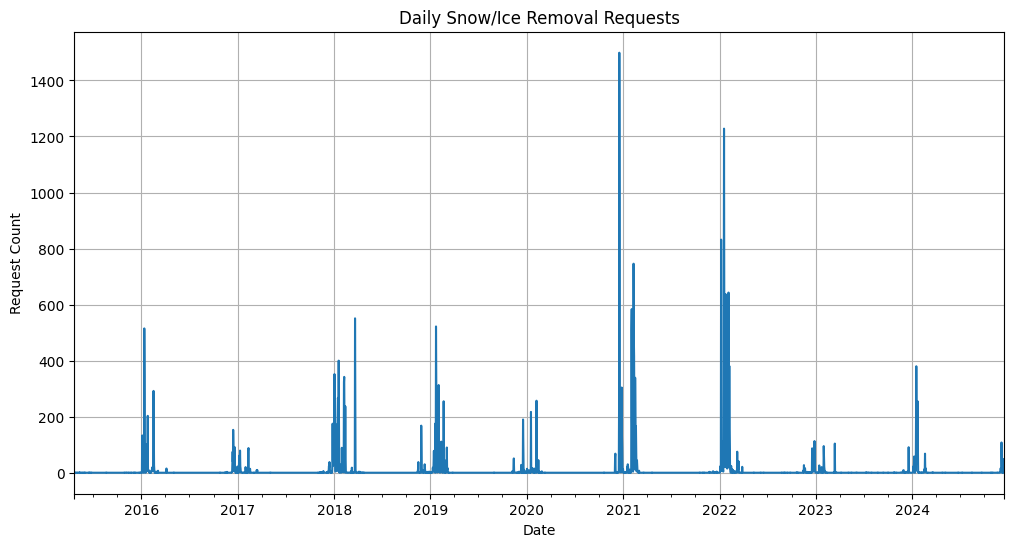

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
ts.plot(title='Daily Snow/Ice Removal Requests')
plt.xlabel('Date')
plt.ylabel('Request Count')
plt.grid()
plt.show()

In [10]:
ts_monthly = ts.resample('ME').sum()
ts_monthly

date
2015-04-30      2.0
2015-05-31      5.0
2015-06-30      4.0
2015-07-31      0.0
2015-08-31      1.0
              ...  
2024-08-31      1.0
2024-09-30      1.0
2024-10-31      1.0
2024-11-30      7.0
2024-12-31    286.0
Freq: ME, Name: num_requests, Length: 117, dtype: float64

In [11]:
df_snow = pd.read_csv('Snowfalldata.csv')
df_snow

,Year,Jan,Feb,Mar,Apr,May,Oct,Nov,Dec,Total
0,2015,18.5,15.4,9.0,0.3,0.0,0.1,0.1,0.3,43.7
1,2016,14.6,9.5,2.1,3.1,0.1,0.0,2.1,6.0,37.5
2,2017,7.5,6.7,9.7,0.1,0.0,0.0,0.1,13.3,37.4
3,2018,17.2,9.7,12.3,7.3,0.0,0.1,3.6,2.0,52.2
4,2019,12.9,12.9,5.2,0.1,0.0,0.1,3.0,4.6,38.8
5,2020,4.9,8.8,1.0,0.1,0.1,0.0,0.8,27.5,43.2
6,2021,12.0,16.1,0.1,2.4,0.0,0.0,1.5,0.7,32.8
7,2022,19.2,5.8,17.1,0.9,0.0,0.0,3.3,2.9,49.2
8,2023,8.1,0.2,3.1,0.1,0.1,0.1,0.6,1.1,13.4
9,2024,9.9,4.2,0.5,0.1,0.0,0.1,0.8,5.7,21.3


In [12]:
snow_data = {
    2015: [18.5, 15.4, 9, 0.3, 0, 0, 0, 0, 0, 0.1, 0.1, 0.3],
    2016: [14.6, 9.5, 2.1, 3.1, 0.1, 0, 0, 0, 0, 0, 2.1, 6],
    2017: [7.5, 6.7, 9.7, 0.1, 0, 0, 0, 0, 0, 0, 0.1, 13.3],
    2018: [17.2, 9.7, 12.3, 7.3, 0,0,0, 0, 0, 0.1, 3.6, 2],
    2019: [12.9, 12.9, 5.2, 0.1, 0, 0, 0, 0,0, 0.1, 3, 4.6],
    2020: [4.9, 8.8, 1.0, 0.1, 0.1, 0, 0,0, 0, 0.1, 0.8, 27.5],
    2021: [12, 16.1, 0.1, 2.4, 0, 0, 0, 0,0, 0, 1.5, 0.7],
    2022: [19.2, 5.8, 17.1, 0.9, 0, 0, 0,0, 0, 0, 3.3, 2.9],
    2023: [8.1, 0.2, 3.1, 0.1, 0.1, 0, 0, 0, 0, 0.1, 0.6, 1.1],
    2024: [9.9, 4.2, 0.5, 0.1, 0, 0, 0,0, 0, 0.1, 0.8, 5.7],
}

snowfall_records = []
for year, values in snow_data.items():
    for month, snow in enumerate(values, start=1):
        date = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(0)
        snowfall_records.append((date, snow))

df_snow = pd.DataFrame(snowfall_records, columns=['date', 'snowfall']).set_index('date')

df_all = pd.concat([ts_monthly.rename("num_requests"), df_snow], axis=1).dropna()
df_all.head()
df_all_snow = df_all.copy()
snow = df_all[['snowfall']]
snow

,snowfall
date,
2015-04-30,0.3
2015-05-31,0.0
2015-06-30,0.0
2015-07-31,0.0
2015-08-31,0.0
...,...
2024-08-31,0.0
2024-09-30,0.0
2024-10-31,0.1


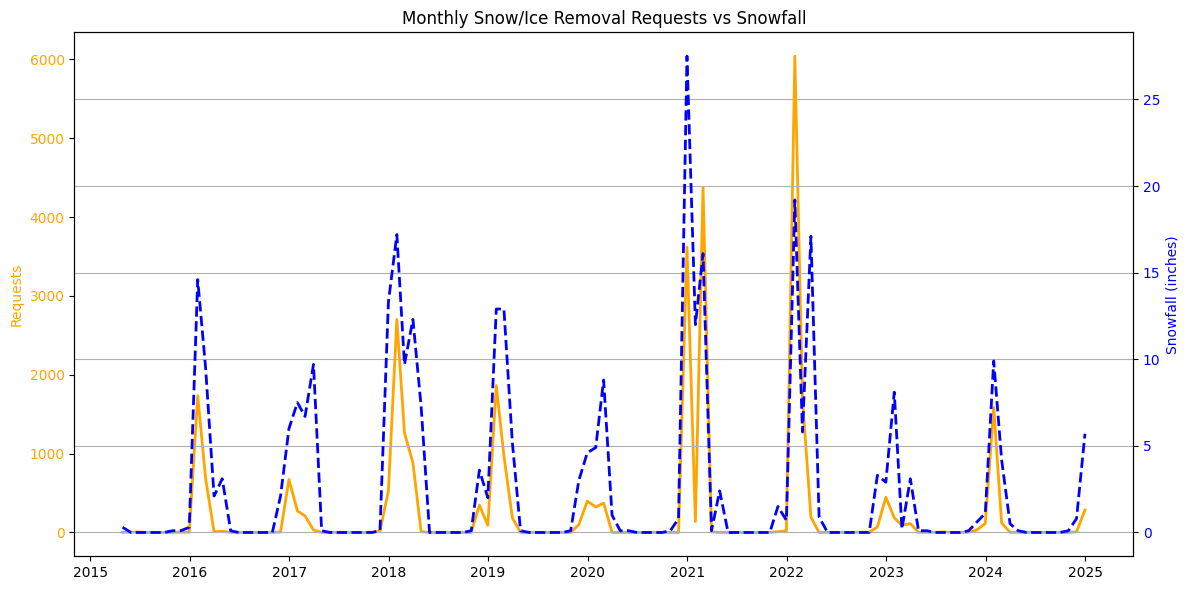

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(ts_monthly.index, ts_monthly, label='Requests', color='orange', linewidth=2)
ax1.set_ylabel('Requests', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(ts_monthly.index, snow, label='Snowfall', color='blue', linestyle='--', linewidth=2)
ax2.set_ylabel('Snowfall (inches)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monthly Snow/Ice Removal Requests vs Snowfall')
fig.tight_layout()
plt.grid()
plt.show()

## SARIMA

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_monthly)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.6226417782733003
p-value: 0.08840737981506619


In [15]:
from sklearn.preprocessing import StandardScaler

test_size = 24

df_all['snow_lag1'] = df_all['snowfall'].shift(1)
df_all['snow_lag2'] = df_all['snowfall'].shift(2)
df_all['snow_ma3'] = df_all['snowfall'].rolling(window=3).mean()
df_all = df_all.dropna()
from scipy.stats import boxcox


# transformed_data, lambda_ = boxcox(df_all['num_requests'] + 1)  # +1避免0值
# df_all['requests_transformed'] = transformed_data

train, test = df_all.iloc[:-test_size], df_all.iloc[-test_size:]
test.columns

Index(['num_requests', 'snowfall', 'snow_lag1', 'snow_lag2', 'snow_ma3'], dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler

from scipy.special import boxcox as boxcox_transform
scaler = StandardScaler()
feature_cols = ['snowfall', 'snow_lag1', 'snow_lag2', 'snow_ma3']
scaler.fit(train[feature_cols])
train_scaled = pd.DataFrame(scaler.transform(train[feature_cols]),
                        columns=[f"{col}_scaled" for col in feature_cols],
                        index=train.index)

test_scaled = pd.DataFrame(scaler.transform(test[feature_cols]),
                       columns=[f"{col}_scaled" for col in feature_cols],
                       index=test.index)


train = pd.concat([train, train_scaled], axis=1)
test = pd.concat([test, test_scaled], axis=1)
train_transformed, lambda_ = boxcox(train['num_requests'] + 1)
train['requests_transformed'] = train_transformed
test['requests_transformed'] = boxcox_transform(test['num_requests'] + 1, lambda_)
test.columns

Index(['num_requests', 'snowfall', 'snow_lag1', 'snow_lag2', 'snow_ma3',
       'snowfall_scaled', 'snow_lag1_scaled', 'snow_lag2_scaled',
       'snow_ma3_scaled', 'requests_transformed'],
      dtype='object')

In [17]:

# df_all_transformed = pd.concat([train, test])

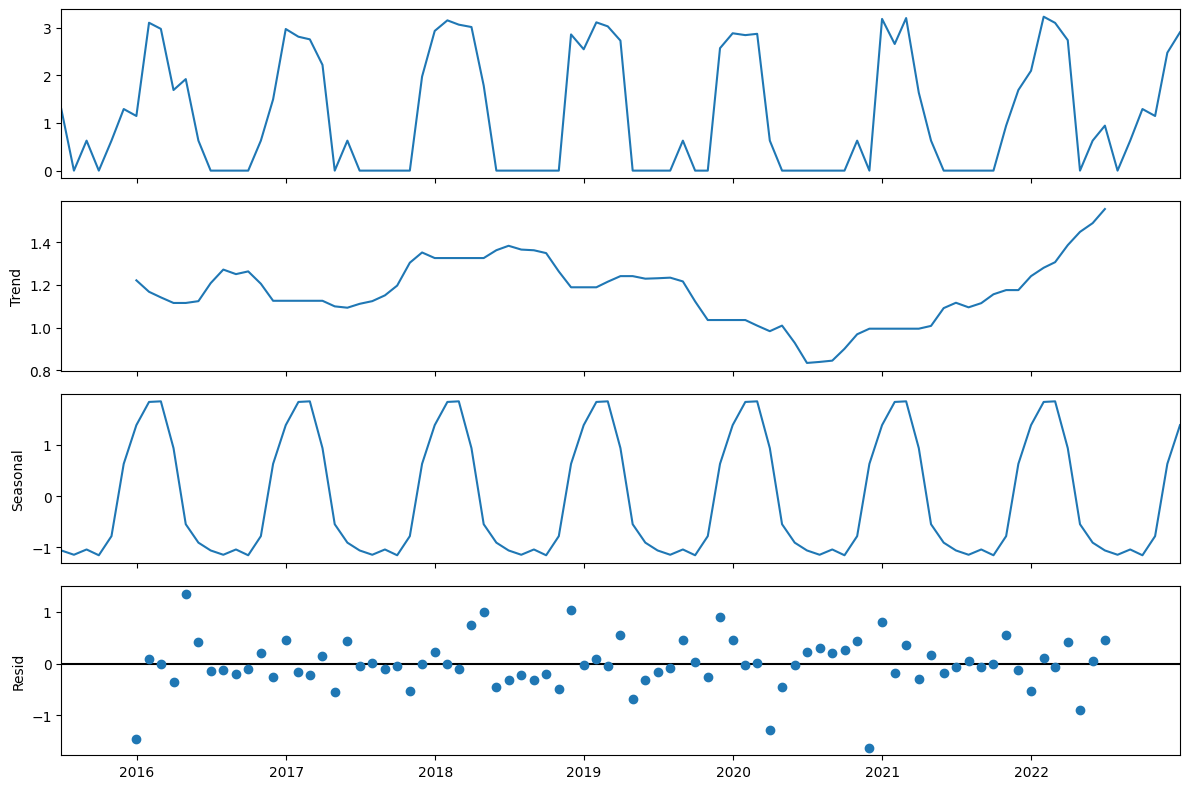

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


result = seasonal_decompose(train[['requests_transformed']], model='additive', period=12)


plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.tight_layout()
plt.show()

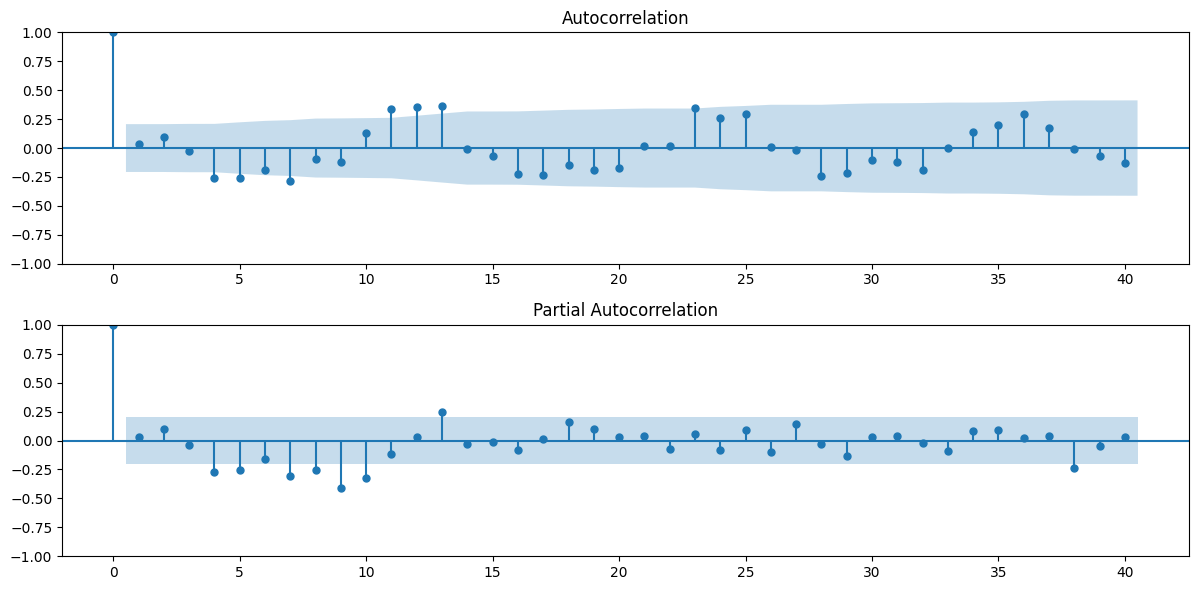

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


diff_ts = train[['requests_transformed']].diff().dropna()


plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(diff_ts, lags=40, ax=plt.gca())  
plt.subplot(212)
plot_pacf(diff_ts, lags=40, ax=plt.gca())
plt.tight_layout()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1395.949, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1325.638, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1337.993, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1310.834, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1304.644, Time=0.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1298.359, Time=0.70 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1305.252, Time=0.36 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1300.109, Time=0.57 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=1299.314, Time=0.90 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1

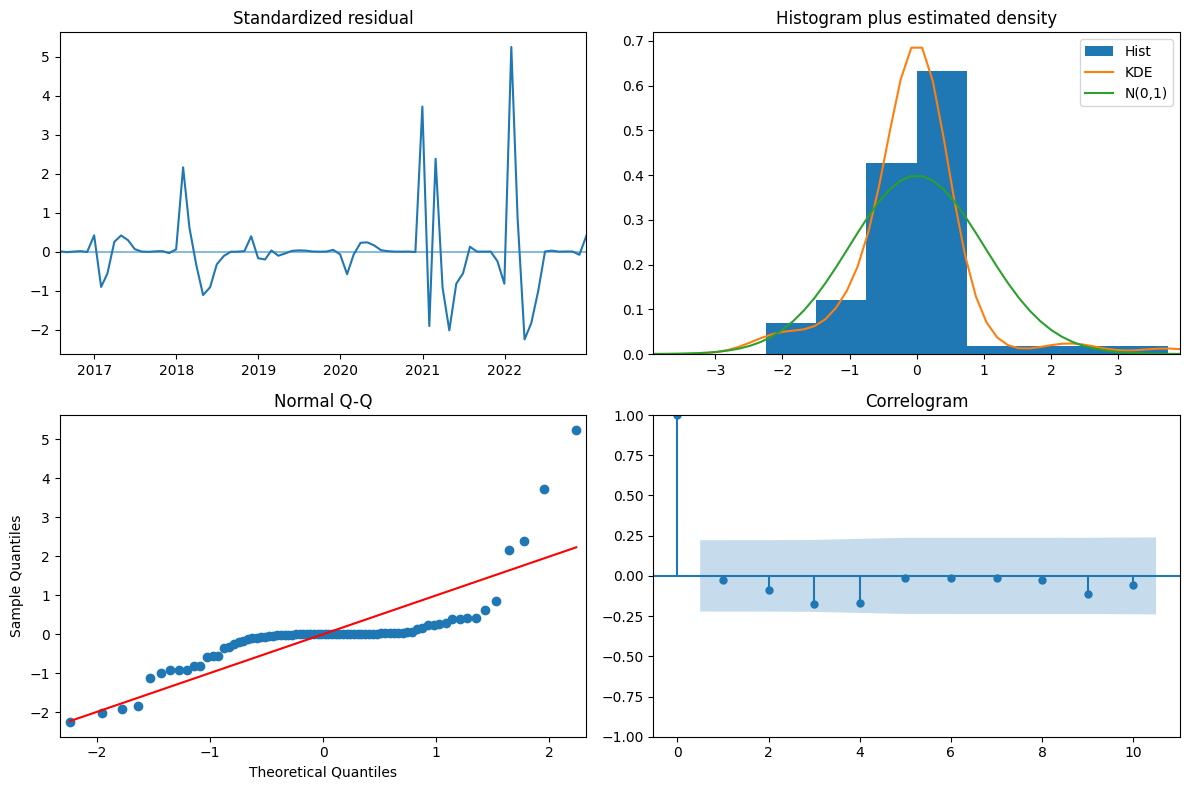

In [20]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

exog_features = ['snowfall_scaled', 'snow_lag1_scaled', 'snow_lag2_scaled','snow_ma3_scaled']
exog_data = train[exog_features]


model = auto_arima(
    train['num_requests'],
    exogenous=exog_data,
    seasonal=True,
    m=12,
    d=1,
    D=1,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    trace=True,
    stepwise=True,
    suppress_warnings=True
)

print(model.summary())
model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train['num_requests'],
               exog=train[exog_features],
               order=(3,1,0),
               seasonal_order=(2,1,1,12))
results = model.fit()

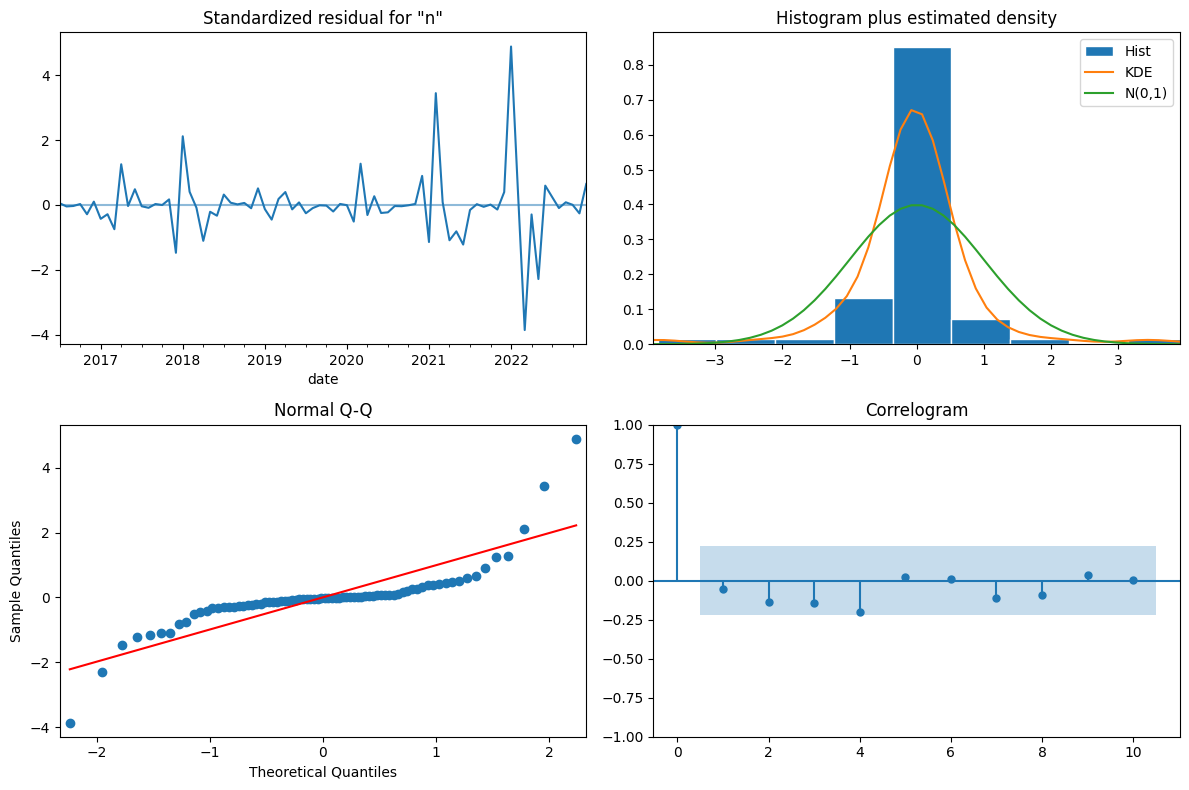

In [22]:
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [23]:
# import numpy as np
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# plot_acf(result.resid, lags=24, ax=ax1, title='ACF')
# ax1.axhline(y=0, linestyle='--', color='gray')
# ax1.axhline(y=-1.96/np.sqrt(len(result.resid)), linestyle='--', color='gray')
# ax1.axhline(y=1.96/np.sqrt(len(result.resid)), linestyle='--', color='gray')

# # PACF
# plot_pacf(result.resid, lags=24, ax=ax2, title='PACF')
# ax2.axhline(y=0, linestyle='--', color='gray')
# ax2.axhline(y=-1.96/np.sqrt(len(result.resid)), linestyle='--', color='gray')
# ax2.axhline(y=1.96/np.sqrt(len(result.resid)), linestyle='--', color='gray')

# plt.tight_layout()
# plt.show()

In [24]:
from scipy.special import inv_boxcox
forecast = results.get_forecast(steps=test_size,
                              exog=test[exog_features])
y_pred = forecast.predicted_mean
y_true = test['num_requests']
y_pred_original = inv_boxcox(y_pred, lambda_)
y_true_original = inv_boxcox(y_true, lambda_)

In [25]:
import numpy as np
import pandas as pd

def calculate_metrics(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)


    mask = y_true != 0


    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))* 100
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

    return {
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4),
        'MAPE(%)': round(mape, 2),
        'sMAPE(%)': round(smape, 2)
    }

In [26]:
metrics = calculate_metrics(y_true, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

result:
MAE: 226.5589
RMSE: 403.8297
MAPE(%): 5767.43
sMAPE(%): 162.67


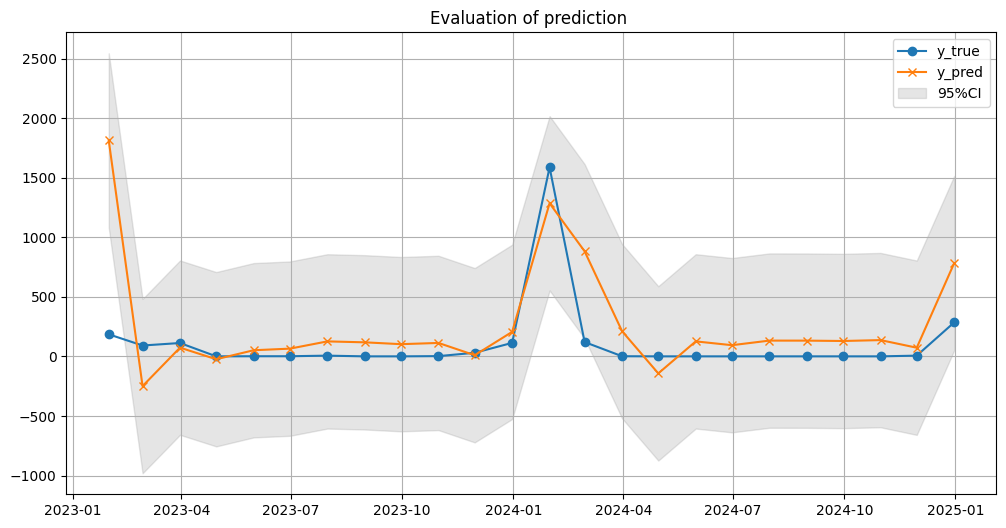

In [27]:
import matplotlib.pyplot as plt

def plot_evaluation(y_true, y_pred, title="Evaluation of prediction "):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true.index, y_true, label='y_true', marker='o')
    plt.plot(y_true.index, y_pred, label='y_pred', marker='x')
    plt.fill_between(y_true.index,
                   y_pred - 1.96*np.std(y_true-y_pred),
                   y_pred + 1.96*np.std(y_true-y_pred),
                   color='gray', alpha=0.2, label='95%CI')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_evaluation(y_true, y_pred)

In [28]:
# plot_evaluation(y_true_original,y_pred_original)

## random forest

In [29]:
df_rf = ts.to_frame().reset_index()
df_rf.columns = ['date', 'num_requests']


In [30]:
df_rf['dayofweek'] = df_rf['date'].dt.dayofweek
df_rf['month'] = df_rf['date'].dt.month
df_rf['dayofyear'] = df_rf['date'].dt.dayofyear
df_rf['is_weekend'] = df_rf['dayofweek'].isin([5, 6]).astype(int)
df_rf['is_winter'] = df_rf['month'].isin([12, 1, 2]).astype(int)

In [31]:
df_rf['lag_1'] = df_rf['num_requests'].shift(1)
df_rf['lag_7'] = df_rf['num_requests'].shift(7)
df_rf['lag_365'] = df_rf['num_requests'].shift(365)

In [32]:
df_rf

,date,num_requests,dayofweek,month,dayofyear,is_weekend,is_winter,lag_1,lag_7,lag_365
0,2015-04-22,1.0,2,4,112,0,0,NaN,NaN,NaN
1,2015-04-23,0.0,3,4,113,0,0,1.0,NaN,NaN
2,2015-04-24,0.0,4,4,114,0,0,0.0,NaN,NaN
3,2015-04-25,0.0,5,4,115,1,0,0.0,NaN,NaN
4,2015-04-26,0.0,6,4,116,1,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3522,2024-12-12,38.0,3,12,347,0,1,2.0,108.0,2.0
3523,2024-12-13,49.0,4,12,348,0,1,38.0,48.0,4.0
3524,2024-12-14,0.0,5,12,349,1,1,49.0,0.0,1.0
3525,2024-12-15,0.0,6,12,350,1,1,0.0,0.0,0.0


In [33]:
df_rf.dropna(inplace=True)

In [34]:
df_rf

,date,num_requests,dayofweek,month,dayofyear,is_weekend,is_winter,lag_1,lag_7,lag_365
365,2016-04-21,0.0,3,4,112,0,0,0.0,0.0,1.0
366,2016-04-22,0.0,4,4,113,0,0,0.0,0.0,0.0
367,2016-04-23,0.0,5,4,114,1,0,0.0,0.0,0.0
368,2016-04-24,0.0,6,4,115,1,0,0.0,0.0,0.0
369,2016-04-25,0.0,0,4,116,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3522,2024-12-12,38.0,3,12,347,0,1,2.0,108.0,2.0
3523,2024-12-13,49.0,4,12,348,0,1,38.0,48.0,4.0
3524,2024-12-14,0.0,5,12,349,1,1,49.0,0.0,1.0
3525,2024-12-15,0.0,6,12,350,1,1,0.0,0.0,0.0


In [35]:
df_rf_onehot = pd.get_dummies(df_rf, columns=['month', 'dayofweek', 'is_winter'], prefix=['month', 'dow', 'winter'])


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = df_rf.drop(columns=['num_requests','date'])
#X = df_rf[['dayofweek', 'month', 'dayofyear', 'is_weekend', 'is_winter', 'lag_1', 'lag_7', 'lag_365']]
y = df_rf['num_requests']


split_idx = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=5,
    random_state=42
)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


metrics = calculate_metrics(y_test, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

result:
MAE: 4.2375
RMSE: 20.1869
MAPE(%): 427.38
sMAPE(%): 187.99


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'sMAPE': smape(y_test, y_pred)
}
print(pd.DataFrame(metrics, index=['Daily RF']))

               MAE       RMSE       sMAPE
Daily RF  4.237541  20.186924  187.989556


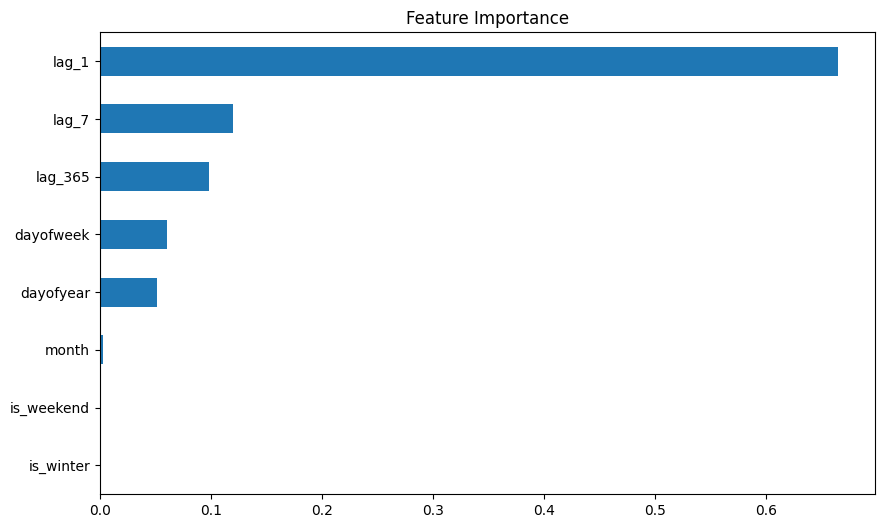

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
pd.Series(rf.feature_importances_, index=X.columns) \
  .sort_values() \
  .plot(kind='barh')
plt.title('Feature Importance')
plt.show()

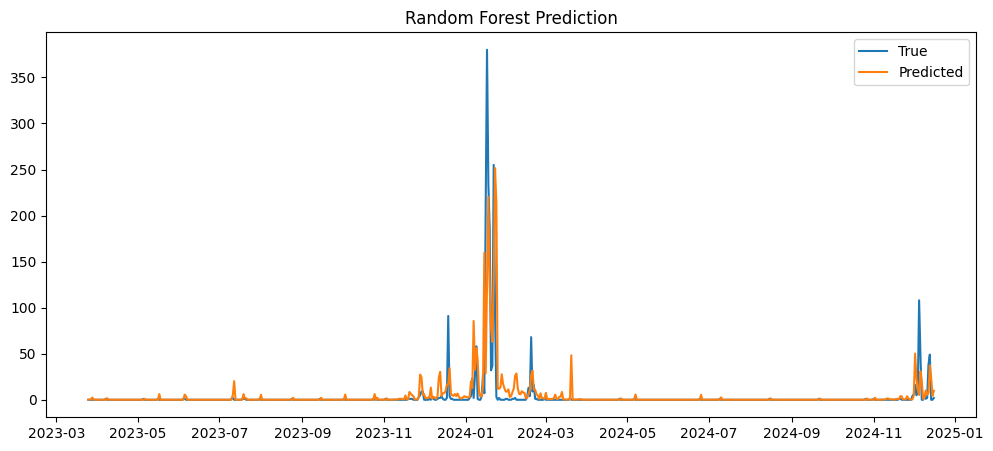

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_rf['date'].iloc[split_idx:], y_test.values, label='True')
plt.plot(df_rf['date'].iloc[split_idx:], y_pred, label='Predicted')
plt.title('Random Forest Prediction')
plt.legend()
plt.show()


In [63]:
df_rf_monthly = df_all.copy()
df
for i in range(1, 4):
    df_rf_monthly[f'req_lag_{i}'] = df_rf_monthly['num_requests'].shift(i)
    df_rf_monthly[f'snow_lag_{i}'] = df_rf_monthly['snowfall'].shift(i)

In [64]:
df_rf_monthly['snow_roll3'] = df_rf_monthly['snowfall'].rolling(window=3).mean()
df_rf_monthly['req_roll3'] = df_rf_monthly['num_requests'].rolling(window=3).mean()

In [65]:
df_rf_monthly.dropna(inplace=True)
X = df_rf_monthly.drop(columns='num_requests')
y = df_rf_monthly['num_requests']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

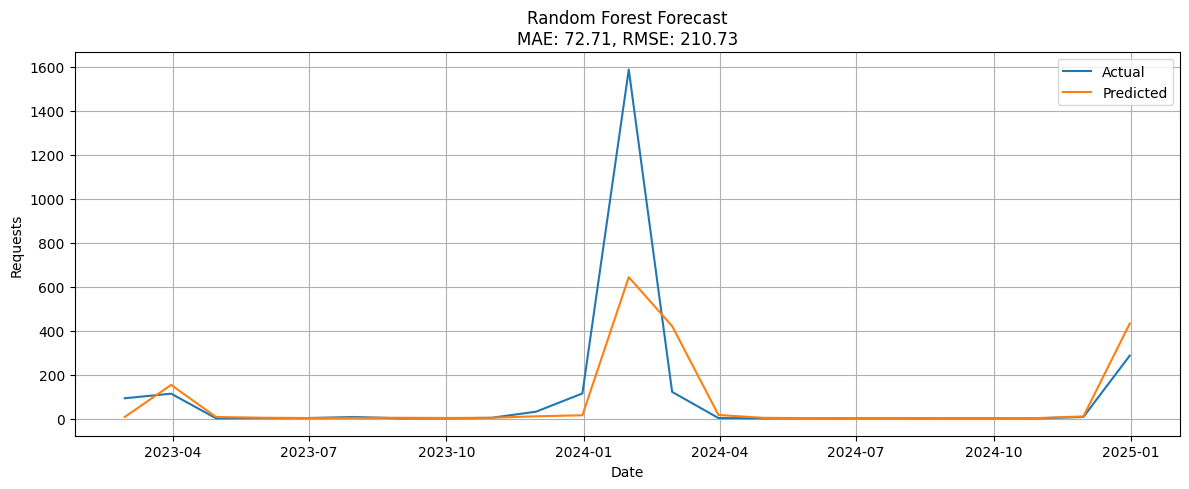

result:
MAE: 72.7083
RMSE: 210.7339
MAPE(%): 133.08
sMAPE(%): 75.62


In [67]:

model = RandomForestRegressor(n_estimators=200,
    max_depth=8,
    min_samples_leaf=5,
    random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title(f'Random Forest Forecast\nMAE: {mae:.2f}, RMSE: {rmse:.2f}')
plt.xlabel("Date")
plt.ylabel("Requests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.head(10)

# print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")
metrics = calculate_metrics(y_test, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

In [45]:
# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)
#
# mae_scores = []
# rmse_scores = []
#
# for train_index, test_index in tscv.split(X):
#     X_train, X_val = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[test_index]
#
#     model = RandomForestRegressor(n_estimators=200,
#     max_depth=8,
#     min_samples_leaf=5,
#     random_state=42)
#     model.fit(X_train, y_train)
#
#     y_pred = model.predict(X_val)
#     mae = mean_absolute_error(y_val, y_pred)
#     rmse = mean_squared_error(y_val, y_pred, squared=False)
#
#     mae_scores.append(mae)
#     rmse_scores.append(rmse)
#
#
# mae_avg = np.mean(mae_scores)
# rmse_avg = np.mean(rmse_scores)
#
# mae_scores, rmse_scores, mae_avg, rmse_avg

## prophet

In [46]:

df_prophet = ts.reset_index()
df_prophet.columns = ['ds', 'y']
df_prophet

,ds,y
0,2015-04-22,1.0
1,2015-04-23,0.0
2,2015-04-24,0.0
3,2015-04-25,0.0
4,2015-04-26,0.0
...,...,...
3522,2024-12-12,38.0
3523,2024-12-13,49.0
3524,2024-12-14,0.0
3525,2024-12-15,0.0


In [48]:

from prophet import Prophet
train_df = df_prophet.iloc[:-300]
test_df = df_prophet.iloc[-300:]

model_prophet = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model_prophet.add_country_holidays(country_name='US')
model_prophet.fit(train_df)

future = model_prophet.make_future_dataframe(periods=300, freq='D')
forecast = model_prophet.predict(future)


forecast['yhat'] = forecast['yhat'].clip(lower=0)
y_pred = forecast.iloc[-300:]['yhat'].values
y_true = test_df['y'].values

# from sklearn.metrics import mean_squared_error, mean_absolute_error
# rmse = mean_squared_error(y_true, y_pred, squared=False)
# mae = mean_absolute_error(y_true, y_pred)
# mape = (abs((y_true - y_pred) / y_true).mean()) * 100

# print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")
metrics = calculate_metrics(y_true, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

23:55:18 - cmdstanpy - INFO - Chain [1] start processing
23:55:19 - cmdstanpy - INFO - Chain [1] done processing


result:
MAE: 2.5554
RMSE: 7.2438
MAPE(%): 263.59
sMAPE(%): nan


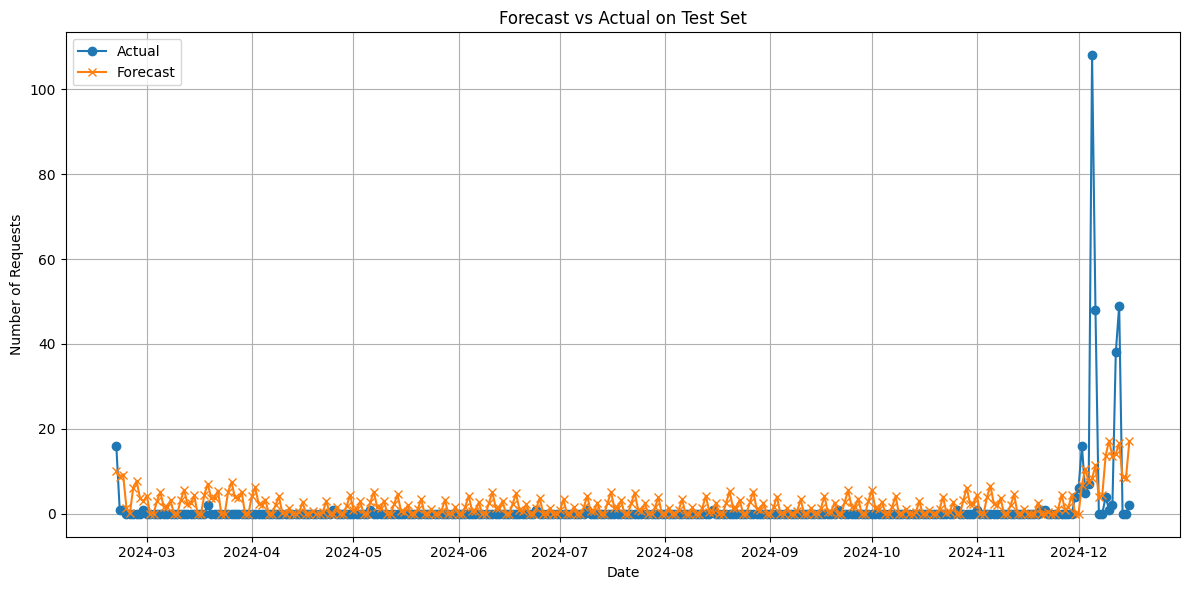

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
plt.plot(test_df['ds'], forecast.iloc[-300:]['yhat'], label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast vs Actual on Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
from prophet import Prophet

model_prophet_full = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model_prophet_full.add_country_holidays(country_name='US')
model_prophet_full.fit(df_prophet)

future = model_prophet_full.make_future_dataframe(periods=500, freq='D')
forecast = model_prophet_full.predict(future)


forecast['yhat'] = forecast['yhat'].clip(lower=0)
y_pred = forecast.iloc[-500:]['yhat'].values
y_true = test_df['y'].values

23:55:27 - cmdstanpy - INFO - Chain [1] start processing
23:55:28 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
import pandas as pd

if isinstance(ts.index, pd.DatetimeIndex):
    start_date = ts.index[-1] + pd.Timedelta(days=1)
else:
    start_date = pd.to_datetime(ts['ds'].iloc[-1]) + pd.Timedelta(days=1)

future_dates = pd.date_range(start=start_date, periods=500, freq='D')

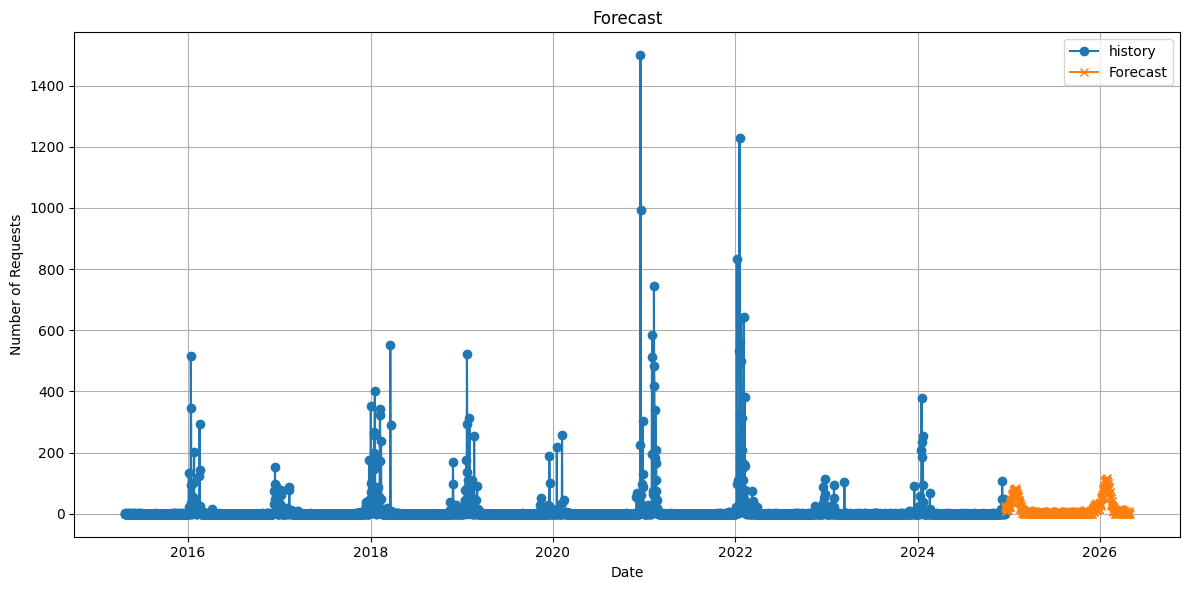

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='history', marker='o')
plt.plot(future_dates, forecast.iloc[-500:]['yhat'], label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
df_prophet_monthly = df_all.reset_index()
df_prophet_monthly
df_pro_train = train[['num_requests','snowfall_scaled','snow_lag1_scaled','snow_lag2_scaled','snow_ma3_scaled']].reset_index()
df_pro_train.columns=['ds','y','snowfall_scaled','snow_lag1_scaled','snow_lag2_scaled','snow_ma3_scaled']
df_pro_test = test[['num_requests','snowfall_scaled','snow_lag1_scaled','snow_lag2_scaled','snow_ma3_scaled']].reset_index()
df_pro_test.columns=['ds','y','snowfall_scaled','snow_lag1_scaled','snow_lag2_scaled','snow_ma3_scaled']
future = df_pro_test.drop(columns='y')
future

,ds,snowfall_scaled,snow_lag1_scaled,snow_lag2_scaled,snow_ma3_scaled
0,2023-01-31,0.885145,-0.049394,0.028722,0.377237
1,2023-02-28,-0.543528,0.889297,-0.043380,0.132597
2,2023-03-31,-0.019078,-0.536792,0.893946,0.148380
3,2023-04-30,-0.561612,-0.013291,-0.530069,-0.482950
4,2023-05-31,-0.561612,-0.554844,-0.007329,-0.490842
5,2023-06-30,-0.579697,-0.554844,-0.548094,-0.735483
6,2023-07-31,-0.579697,-0.572896,-0.548094,-0.743374
7,2023-08-31,-0.579697,-0.572896,-0.566120,-0.751266
8,2023-09-30,-0.579697,-0.572896,-0.566120,-0.751266
9,2023-10-31,-0.561612,-0.572896,-0.566120,-0.743374


In [54]:

from prophet import Prophet


model_prophet_monthly = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model_prophet_monthly.add_country_holidays(country_name='US')
model_prophet_monthly.add_regressor('snowfall_scaled')
model_prophet_monthly.add_regressor('snow_lag1_scaled')
model_prophet_monthly.add_regressor('snow_lag2_scaled')
model_prophet_monthly.add_regressor('snow_ma3_scaled')
model_prophet_monthly.fit(df_pro_train)

# future = model_prophet_monthly.make_future_dataframe(periods=24, freq='M')
forecast = model_prophet_monthly.predict(future)



forecast['yhat'] = forecast['yhat'].clip(lower=0)
y_pred = forecast.iloc[-30:]['yhat'].values
y_true = df_pro_test['y'].values

# from sklearn.metrics import mean_squared_error, mean_absolute_error
# rmse = mean_squared_error(y_true, y_pred, squared=False)
# mae = mean_absolute_error(y_true, y_pred)
# mape = (abs((y_true - y_pred) / y_true).mean()) * 100

# print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")
metrics = calculate_metrics(y_true, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

23:56:04 - cmdstanpy - INFO - Chain [1] start processing
23:56:04 - cmdstanpy - INFO - Chain [1] done processing


result:
MAE: 208.7996
RMSE: 347.6826
MAPE(%): 6492.32
sMAPE(%): 163.46


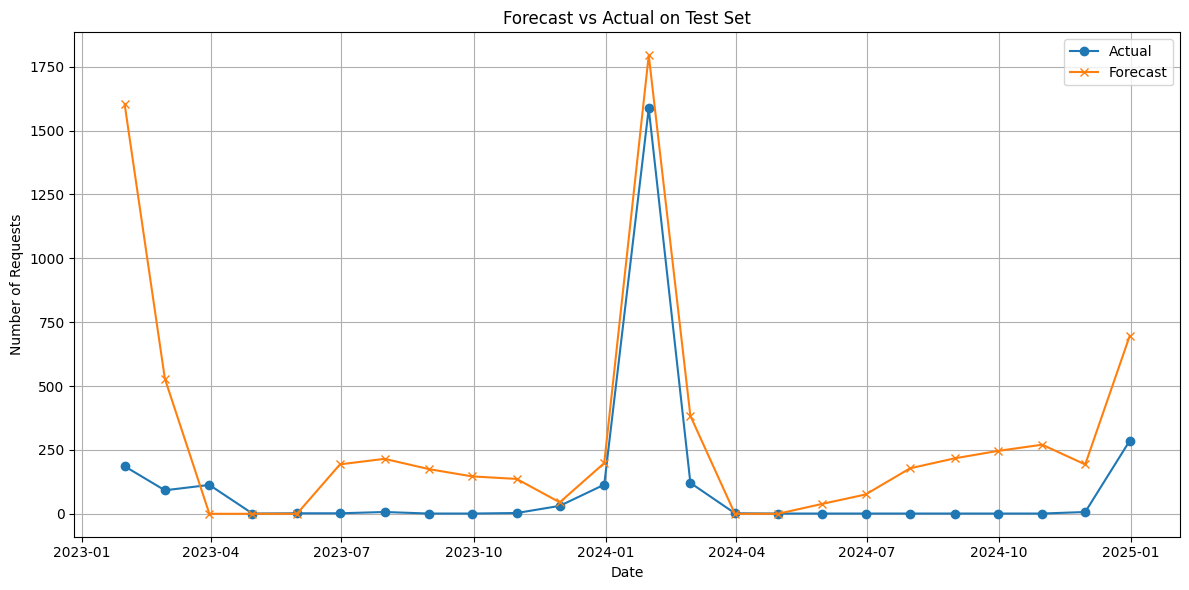

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_pro_test['ds'], df_pro_test['y'], label='Actual', marker='o')
plt.plot(df_pro_test['ds'], y_pred, label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast vs Actual on Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
from prophet import Prophet

df_prophet_monthly = df_all_snow.reset_index()
df_prophet_monthly.columns = ['ds', 'y','snowfall']

train_df = df_prophet_monthly.iloc[:-24]
test_df = df_prophet_monthly.iloc[-24:]

model_prophet_monthly = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model_prophet_monthly.add_regressor('snowfall')
model_prophet_monthly.fit(train_df)

future = model_prophet_monthly.make_future_dataframe(periods=24, freq='M')


23:56:13 - cmdstanpy - INFO - Chain [1] start processing
23:56:13 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future = df_prophet_monthly[['ds', 'snowfall']]


forecast = model_prophet_monthly.predict(future)

In [58]:
y_true = test_df['y'].values
y_pred = forecast.iloc[-24:]['yhat'].values
y_pred = np.where(y_pred < 0, 0, y_pred)


# rmse = mean_squared_error(y_true, y_pred, squared=False)
# mae = mean_absolute_error(y_true, y_pred)
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# rmse, mae, mape

metrics = calculate_metrics(y_true, y_pred)

print("result:")
for k, v in metrics.items():
    print(f"{k}: {v}")

result:
MAE: 220.1515
RMSE: 326.9165
MAPE(%): 8228.34
sMAPE(%): 166.76


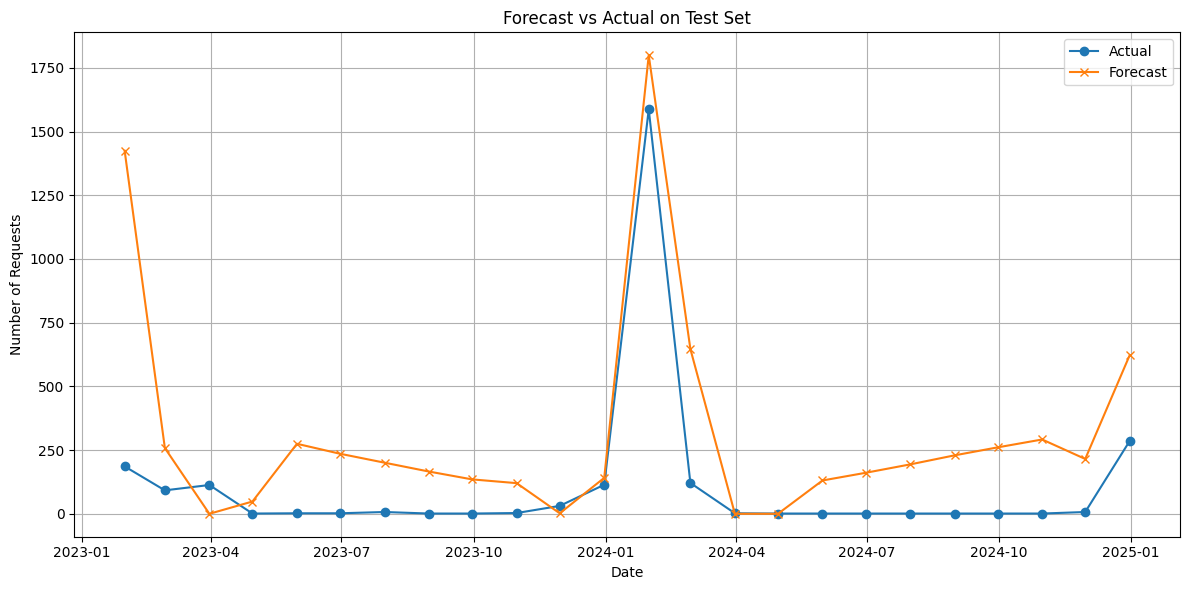

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
plt.plot(test_df['ds'], y_pred, label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast vs Actual on Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:

df_prophet_monthly = ts_monthly.reset_index()
df_prophet_monthly.columns = ['ds', 'y']


from prophet import Prophet

model_prophet = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model_prophet.fit(df_prophet_monthly)

future = model_prophet.make_future_dataframe(periods=16, freq='M')
forecast = model_prophet.predict(future)



23:56:48 - cmdstanpy - INFO - Chain [1] start processing
23:56:48 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
import pandas as pd

if isinstance(ts_monthly.index, pd.DatetimeIndex):
    start_date = ts.index[-1] + pd.Timedelta(days=1)
else:
    start_date = pd.to_datetime(ts['ds'].iloc[-1]) + pd.Timedelta(months=1)

future_dates = pd.date_range(start=start_date, periods=16, freq='ME')
future_dates

DatetimeIndex(['2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30',
               '2025-12-31', '2026-01-31', '2026-02-28', '2026-03-31'],
              dtype='datetime64[ns]', freq='ME')

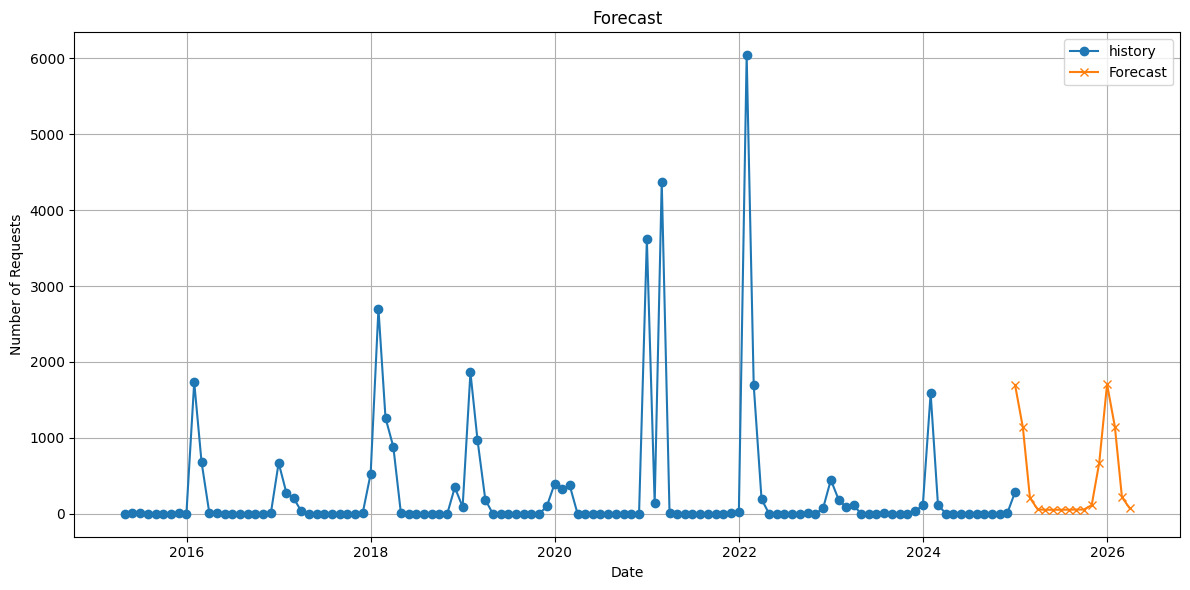

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(ts_monthly.index, ts_monthly, label='history', marker='o')
plt.plot(future_dates, forecast.iloc[-16:]['yhat'], label='Forecast', marker='x')
#plt.fill_between(test_df['ds'], y_pred['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()